In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
print('Files in Drive:')
!ls drive/Datasets/Image-classification/

Files in Drive:
drive  not_santa  santa


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.


In [0]:
class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [0]:
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

In [0]:
santa_label=np.array([1])
not_santa_label=np.array([0])
images=[]
label =[]

In [0]:
def load_images_from_folder(folder,b,images,labels):
    
    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (112, 112))
        img = img_to_array(img)
        
        if img is not None:
            #images.append(img)
            #images.append([1])
            
            labels.append(b)
            
            
            images.append(img)
    #print(img[0].shape,type(img))
    


In [0]:
load_images_from_folder("drive/Datasets/Image-classification/santa",santa_label,images,label)

In [121]:
len(images)

922

In [122]:
len(label)

922

In [0]:
load_images_from_folder("drive/Datasets/Image-classification/not_santa",not_santa_label,images,label)

In [123]:
print(len(label))
print(len(images))

922
922


In [0]:
train_img=np.array(images)
label_img = np.array(label)

In [125]:
train_img.shape

(922, 112, 112, 3)

In [126]:
label_img.shape

(922, 1)

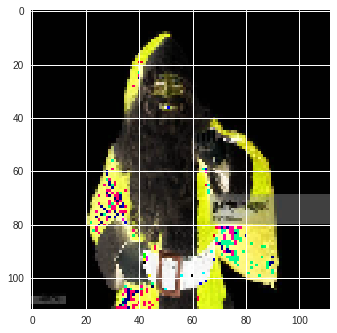

In [129]:
plt.imshow(train_img[40,:,:,:])
plt.show()

In [0]:
data = train_img[:,:,:,:]/ 255.0

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.23, random_state=42,shuffle=True)

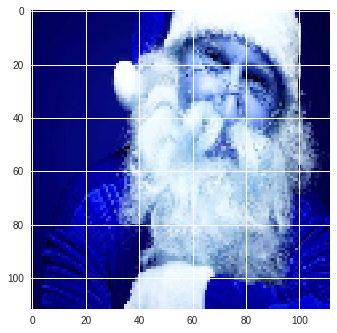

In [132]:
plt.imshow(X_train[4])
plt.show()

In [0]:
# convert the labels from integers to vectors
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [0]:
# initialize the number of epochs to train for, initial learning rate, and batch size.
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
random.seed(42)

In [135]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 112, 112, 20)      1520      
_________________________________________________________________
activation_9 (Activation)    (None, 112, 112, 20)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 50)        25050     
_________________________________________________________________
activation_10 (Activation)   (None, 56, 56, 50)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 50)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 39200)             0         
__________

In [136]:
X_train.shape

(709, 112, 112, 3)

In [137]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=112, height=112, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [140]:
# train the network
print("[INFO] training network...")
history = model.fit(X_train, y_train, batch_size=BS,validation_split=0.15,epochs=EPOCHS, verbose=2)

[INFO] training network...
Train on 602 samples, validate on 107 samples
Epoch 1/25
 - 4s - loss: 2.3703 - acc: 0.5216 - val_loss: 0.5952 - val_acc: 0.5140
Epoch 2/25
 - 1s - loss: 0.5418 - acc: 0.7458 - val_loss: 0.3790 - val_acc: 0.8224
Epoch 3/25
 - 1s - loss: 0.4002 - acc: 0.8538 - val_loss: 0.4267 - val_acc: 0.8224
Epoch 4/25
 - 1s - loss: 0.2423 - acc: 0.9203 - val_loss: 0.6883 - val_acc: 0.7944
Epoch 5/25
 - 1s - loss: 0.2504 - acc: 0.9219 - val_loss: 0.2724 - val_acc: 0.8879
Epoch 6/25
 - 1s - loss: 0.1872 - acc: 0.9385 - val_loss: 0.2395 - val_acc: 0.8879
Epoch 7/25
 - 1s - loss: 0.1103 - acc: 0.9651 - val_loss: 0.2666 - val_acc: 0.8879
Epoch 8/25
 - 1s - loss: 0.0844 - acc: 0.9751 - val_loss: 0.2349 - val_acc: 0.9065
Epoch 9/25
 - 1s - loss: 0.0756 - acc: 0.9767 - val_loss: 0.2642 - val_acc: 0.9159
Epoch 10/25
 - 1s - loss: 0.0251 - acc: 0.9967 - val_loss: 0.2491 - val_acc: 0.9252
Epoch 11/25
 - 1s - loss: 0.0124 - acc: 0.9967 - val_loss: 0.2113 - val_acc: 0.9346
Epoch 12/25


In [141]:
scores = model.evaluate(X_test, y_test, verbose=2)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


Accuracy: 88.26%


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


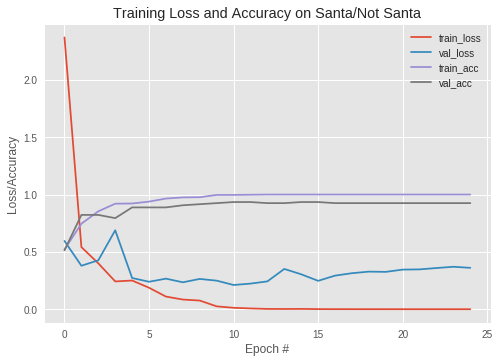

In [144]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Santa/Not Santa")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="top right")
plt.show()